# Lab 3

## Intro:
On this Laboratory session we are going to work with affine transformations and camera prjections.
Create a zip File with the next structure: Surname_YourName_Lab4.zip with your solutions inside.
Please, remember to provide comments about your procedure.
You have to deliver this assignment on the digital campus before: 9th Jan at 17.30h.

---
Import packages

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

## Exercise 1:

The point p has coordinates $^A p = (3, 4)^T$ on a frame {$A$} and coordinates $^B p = (-2.5, 0.5)^T$ on a frame {$B$}. It is known that the angle between axis of frame {$A$} and the axes of frame {$B$} is 30deg counterclockwise.



In [17]:
A_p = np.atleast_2d([3, 4]).T
B_p = np.atleast_2d([-2.5, 0.5]).T
angle = 30 #degrees

### 1.1 
Which are the coordinates of the origin of {$A$} as seen from {$B$}?

In [18]:
R_ab = np.array([[ np.cos(angle),(np.sin(angle)),],
                [ -(np.sin(angle)),np.cos(angle),]])


a_D_ab = -(R_ab@(A_p)) + B_p
print(a_D_ab)


[[ 0.98937215]
 [-3.08110067]]


### 1.2

Which are the coordinates of the origin of {$B$} seen from {$A$}?

In [19]:
R_ba = np.array([[ np.cos(angle),-(np.sin(angle)),],
                  [ np.sin(angle),np.cos(angle),]])


b_D_ba = -(R_ba@(B_p)) + A_p
print(b_D_ba)

[[2.89161281]
 [1.45279521]]


### 1.3
Which are the coordinates of a point q expressed in {$A$} if $^B q = (-2.5, 0.5)^T$

In [20]:
q = (R_ba @ B_p) + b_D_ba
print(q)

[[3.]
 [4.]]


---

## Exercise 2

Let {$A$}, {$B$} and {$C$} to be 3 different reference frames. From them we know that:

- The origin of {$B$} seen from {$A$} is $^A o_B = (3,1,-2)^{T}$
- The origin of {$C$} seen from {$B$} is  $^B o_C = (-3,1,-2)^{T}$
- The three frames has different orientations in space. In fact:
  - The set of Euler angles stored in $\eta$ as $\eta = (\psi, \theta, \phi)^T$ with $\eta = (25, 145, 30)^T$ (in degrees)represents 3 consecutive rotations about z, y, and x respectively that allows to transform from {$B$} to {$A$} (only rotation) as $^Av =  \,^A{\bf{R}}_B \, ^Bv  = {\bf{R}}(\psi,\theta,\varphi)  \, ^Bv$
  - The quaternion $\mathring{q} = \frac{1}{7}(-3.5\sqrt{3}, 3, -1, -1.5)^T$ allows to express in {$B$} a vector defined in {$C$}, if {$B$} and {$C$} had the same origin

Let in addition $^C v_1 = (0,2,0)^{T} $ and $^C v_2 = (0,2,5)^{T}$ to be points which coordinates are known in {$C$}

In [21]:
A_O_B = np.atleast_2d([3,1,-2]).T
B_O_C = np.atleast_2d([-3,1,-2]).T
eta = np.array([25,145,30]) # In degrees
q = 1/7* np.atleast_2d([-3.5*np.sqrt(3), 3, -1, -1.5]).T
C_v1 = np.atleast_2d([0, 2, 0]).T
C_v2 = np.atleast_2d([0, 2, 5]).T



With the information provided above, provide:

### 2.1 
The affine expression (Formula! no matrix here) that allows to relate a vector originally given in {$C$} to {$B$}

### 2.2
 The affine matrix that allows to express a vector originally given in {$C$} to {$A$}

### 2.3
The coordinates of the vectors $^C v_1$ and $^C v_2$ in frames {$A$} and {$B$}

---

## Exercise 3

The points described by the columns of the matrix A are points contained into a circle, and they are defined in a world frame {$W$}. A camera is situated at point $^W c = (11, 6, 1)^T$ defined in the world frame. Moreover the orientation of this camera frame is achieved by rotating the world frame -90deg about its $y$ axis followed by -20deg about the resulting $z$ axis. If the camera has a focal length $f = \frac{1}{34}$ m:

In [21]:
A = np.load('ex3.npy')
print("First 5 columns of A")
print(A[:,1:5])

w_C = np.atleast_2d([11, 6, 1]).T
alpha1 = -90 # deg abput y
alpha2 = -20 # deg abput z
f = 1.0/34 # m

First 5 columns of A
[[6.90178002 6.88824197 6.8658289  6.83476475]
 [6.09983342 6.19866933 6.29552021 6.38941834]
 [1.57949307 1.58580597 1.59625735 1.6107428 ]]


### 3.1
Implement a function that takes as argument the World to Camera afine matrix, the focal distance and a list of 3D points in the world frame and returns a list of 2D points projected on the camera plane

On the next cell is implemented a way to got the World to Camera affine matrix

In [40]:
Rotz = np.matrix([[np.cos(np.radians(alpha2)), np.sin(np.radians(alpha2)), 0], [-np.sin(np.radians(alpha2)), np.cos(np.radians(alpha2)), 0], [0, 0, 1]])
Roty = np.matrix([[np.cos(np.radians(alpha1)), 0, -np.sin(np.radians(alpha1))], [0, 1, 0], [np.sin(np.radians(alpha1)), 0, np.cos(np.radians(alpha1))]])

R = Roty@Rotz

#Distance from C to W as seen from C using the transpose rotation matrix and the distance from W to C seen from W.
c_W = -R.T @ w_C

#Afine Matrix from c to W
c_to_W = np.matrix([[R[0, 0], R[0, 1], R[0, 2], c_W[0, 0]],
                    [R[1, 0], R[1, 1], R[1, 2], c_W[1, 0]],
                    [R[2, 0], R[2, 1], R[2, 2], c_W[2, 0]],
                    [0, 0, 0, 1]])

#Afine Matrix from W to c
W_to_c = np.matrix([[R.T[0, 0], R.T[0, 1], R.T[0, 2], w_C[0, 0]],
                    [R.T[1, 0], R.T[1, 1], R.T[1, 2], w_C[1, 0]],
                    [R.T[2, 0], R.T[2, 1], R.T[2, 2], w_C[2, 0]],
                    [0, 0, 0, 1]])

print("Rotation Matrix from World to Camera:")
print(R)

print("\nFrom World to Camera:")
print(W_to_c)

Rotation Matrix from World to Camera:
[[ 5.75395780e-17 -2.09426937e-17  1.00000000e+00]
 [ 3.42020143e-01  9.39692621e-01  0.00000000e+00]
 [-9.39692621e-01  3.42020143e-01  6.12323400e-17]]

From World to Camera:
[[ 5.75395780e-17  3.42020143e-01 -9.39692621e-01  1.10000000e+01]
 [-2.09426937e-17  9.39692621e-01  3.42020143e-01  6.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  6.12323400e-17  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [41]:
def W_to_Cam_proj(CAW, f, p3D):

  p2d = np.zeros((2,len(p3D.T)))
  h = np.ones((1, len(p3D.T)))
  p3Dh = np.vstack((p3D, h))
 
  p3Dc = CAW @ p3Dh

  for i in range(len(p3D.T)):
    p2d[0, i] = (p3Dc[0, i] / p3Dc[2, i]) * f
    p2d[1, i] = (p3Dc[1, i] / p3Dc[2, i]) * f
        
  return p2d
  
print(W_to_Cam_proj(c_to_W, f, A))

[[-0.00088583 -0.00089207 -0.00090686 -0.00093017 -0.00096187 -0.0010018
  -0.00104971 -0.00110528 -0.00116814 -0.00123781 -0.00131377 -0.00139539
  -0.00148197 -0.00157274 -0.00166686 -0.00176341 -0.00186141 -0.00195984
  -0.00205763 -0.00215367 -0.00224686 -0.0023361  -0.00242029 -0.0024984
  -0.00256945 -0.00263253 -0.00268686 -0.00273174 -0.00276661 -0.00279105
  -0.00280479 -0.00280771 -0.00279982 -0.00278132 -0.0027525  -0.00271382
  -0.00266585 -0.00260925 -0.00254479 -0.0024733  -0.00239567 -0.00231283
  -0.00222575 -0.00213538 -0.00204271 -0.00194868 -0.00185424 -0.00176029
  -0.00166769 -0.00157727 -0.00148982 -0.00140607 -0.00132669 -0.00125233
  -0.00118355 -0.00112089 -0.00106483 -0.00101578 -0.00097413 -0.00094019
  -0.00091424 -0.00089651 -0.00088715]
 [-0.00384863 -0.00403445 -0.00421573 -0.00439089 -0.00455837 -0.0047166
  -0.00486408 -0.00499931 -0.00512087 -0.0052274  -0.00531763 -0.00539039
  -0.00544464 -0.0054795  -0.00549423 -0.0054883  -0.00546139 -0.00541341
  

### 3.2
Make a plot with the view of the points of the circle projected into the camera plane.

(-0.01, 0.0)

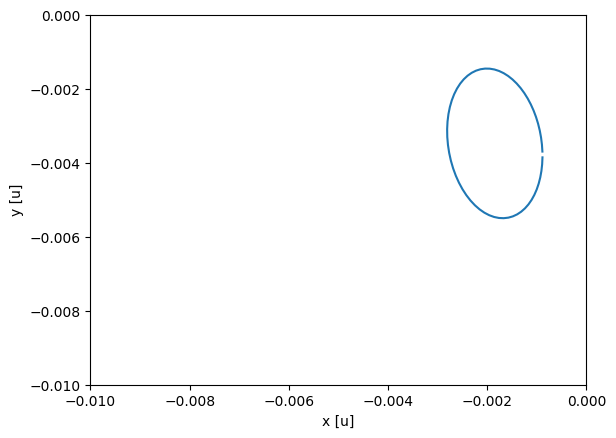

In [38]:
plt.plot(W_to_Cam_proj(c_to_W, f, A)[0], W_to_Cam_proj(c_to_W, f, A)[1])

plt.xlabel("x [u]")
plt.ylabel("y [u]")

plt.xlim([-0.01, 0])
plt.ylim([-0.01, 0])

### 3.2
Make also a 3D plot where all the scene is drawn in the world coordinates. The scene must contain the 2 reference frames (2 orthogonal sets of vectors) and the circle points. You have an example of how to draw axis at the end of this netebook.

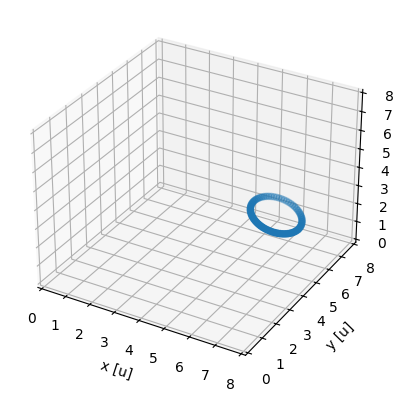

In [42]:
origin = np.atleast_2d([0,0,0]).T
x_axis = np.atleast_2d([1,0,0]).T
y_axis = np.atleast_2d([0,1,0]).T
z_axis = np.atleast_2d([0,0,1]).T

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(A[0], A[1], A[2])

Cx_axis = W_to_c@np.append(x_axis, np.array([[1]]), axis=0)
Cy_axis = W_to_c@np.append(y_axis, np.array([[1]]), axis=0)
Cz_axis = W_to_c@np.append(z_axis, np.array([[1]]), axis=0)

x, y, z = np.hstack((w_C[0, 0],Cx_axis[0, 0])), np.hstack((w_C[1, 0],Cx_axis[1, 0])), np.hstack((w_C[2, 0], Cx_axis[2, 0]))
ax.plot(x, y, z, 'g')
x, y, z = np.hstack((w_C[0, 0],Cy_axis[0, 0])), np.hstack((w_C[1, 0],Cy_axis[1, 0])), np.hstack((w_C[2, 0], Cy_axis[2, 0]))
ax.plot(x, y, z, 'g')
x, y, z = np.hstack((w_C[0, 0],Cz_axis[0, 0])), np.hstack((w_C[1, 0],Cz_axis[1, 0])), np.hstack((w_C[2, 0], Cz_axis[2, 0]))
ax.plot(x, y, z, 'r')

ax.set_xlabel("x [u]")
ax.set_ylabel("y [u]")
ax.set_zlabel("z [u]")

plt.xlim([0, 8])
plt.ylim([0, 8])
ax.set_zlim([0, 8])

plt.show()

---

## Exercise 4

The columns of the matrix $A$, represents the coordinates of 4 points defined in a world frame. From this 4 points, two segments are defined. The segment one, goes from the point defined by the first column to the point defined by the second column. The second segment is defined by the other two points. 

A camera frame is seeing the scene. The origin of the world frame seen from the camera frame is given by the vector $^C w = (4.665, 3.735, -0.5395)^T$. And the orientation of the camera frame is obtained after rotating the world frame $-170$deg about the direction $u = (0.01, -0.2, 1)^T$


In [24]:
A = np.load('ex4.npy')
print(A)
C_w = np.atleast_2d([4.665, 3.735, -0.5395]).T
angle = -170 # degrees
u = np.atleast_2d([0.01,-.2,1]).T


[[0.91147867 3.72073483 1.96592583 2.66628767]
 [1.93969262 2.87938524 1.         3.81907786]
 [3.33036609 4.43718931 3.25881905 4.50873636]]




With the data provided determine:
### 4.1 The minimum angle that both segments forms (hint, they intersect)

In [1]:
import numpy as np

# Matriz A
A = np.array([[0.91147867, 3.72073483, 1.96592583, 2.66628767],
              [1.93969262, 2.87938524, 1.        , 3.81907786],
              [3.33036609, 4.43718931, 3.25881905, 4.50873636]])

# Definición de los segmentos a partir de los puntos
segmento1 = A[:, 1] - A[:, 0]
segmento2 = A[:, 3] - A[:, 2]

# Cálculo de los ángulos
cos_theta = np.dot(segmento1, segmento2) / (np.linalg.norm(segmento1) * np.linalg.norm(segmento2))
theta = np.arccos(cos_theta)
angulo_en_grados = np.degrees(theta)

print(f"{angulo_en_grados} grados")

53.13010253636807 grados


### 4.2
  The angle that both segments forms in the image plane

In [1]:
import numpy as np

# Puntos de la matriz A
A = np.array([[0.91147867, 3.72073483, 1.96592583, 2.66628767],
              [1.93969262, 2.87938524, 1.        , 3.81907786],
              [3.33036609, 4.43718931, 3.25881905, 4.50873636]])

# Proyección de los puntos en el plano XY (ignorando la coordenada z)
proyectados = A[:2, :]

# Definición de los segmentos proyectados
segmento1_proyectado = proyectados[:, 1] - proyectados[:, 0]
segmento2_proyectado = proyectados[:, 3] - proyectados[:, 2]

# Cálculo del ángulo entre los segmentos proyectados
cos_theta = np.dot(segmento1_proyectado, segmento2_proyectado) / (
            np.linalg.norm(segmento1_proyectado) * np.linalg.norm(segmento2_proyectado))
theta = np.arccos(cos_theta)
angulo_en_grados = np.degrees(theta)

print(f"{angulo_en_grados} grados")

57.55307694414637 grados


---

---

## Hints

### Representing scenes in 3d with matplotlib

In 3D scenes have to be drawn from one (unique) reference frame, hence all the scene points have to be transformed to it previously to plot.

The current sceene has two frames.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

Wdwc = np.atleast_2d([4, 0, 0]).T

CRW = np.array([[1, 0, 0], 
                [0, 0, -1],
                [0, 1, 0]])  

CAW = np.concatenate((CRW, -CRW@Wdwc),axis=1)
CAW = np.concatenate((CAW, np.array([[0, 0, 0, 1]])),axis=0)
print(CAW)

WAC  = np.concatenate((CRW.T, Wdwc),axis=1)
WAC = np.concatenate((WAC, np.array([[0, 0, 0, 1]])),axis=0)
print(WAC)

[[ 1  0  0 -4]
 [ 0  0 -1  0]
 [ 0  1  0  0]
 [ 0  0  0  1]]
[[ 1  0  0  4]
 [ 0  0  1  0]
 [ 0 -1  0  0]
 [ 0  0  0  1]]


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

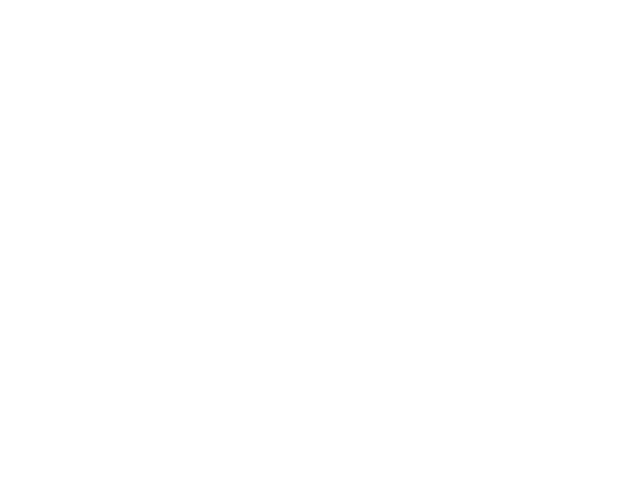

In [ ]:
origin = np.atleast_2d([0,0,0]).T
xaxis = np.atleast_2d([1,0,0]).T
yaxis = np.atleast_2d([0,1,0]).T
zaxis = np.atleast_2d([0,0,1]).T

Cx = WAC@np.append(xaxis, np.array([[1]]), axis=0)
Cy = WAC@np.append(yaxis, np.array([[1]]), axis=0)
Cz = WAC@np.append(zaxis, np.array([[1]]), axis=0)

#Generate figure
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot first reference frame
x, y, z = np.hstack((origin[0],xaxis[0])), np.hstack((origin[1],xaxis[1])), np.hstack((origin[2], xaxis[2])) 
ax.plot(x, y, z, 'b')
x, y, z = np.hstack((origin[0],yaxis[0])), np.hstack((origin[1],yaxis[1])), np.hstack((origin[2], yaxis[2])) 
ax.plot(x, y, z, 'b')
x, y, z = np.hstack((origin[0],zaxis[0])), np.hstack((origin[1],zaxis[1])), np.hstack((origin[2], zaxis[2])) 
ax.plot(x, y, z, 'r')

# plot second reference frame
x, y, z = np.hstack((Wdwc[0],Cx[0])), np.hstack((Wdwc[1],Cx[1])), np.hstack((Wdwc[2], Cx[2])) 
ax.plot(x, y, z, 'g')
x, y, z = np.hstack((Wdwc[0],Cy[0])), np.hstack((Wdwc[1],Cy[1])), np.hstack((Wdwc[2], Cy[2])) 
ax.plot(x, y, z, 'g')
x, y, z = np.hstack((Wdwc[0],Cz[0])), np.hstack((Wdwc[1],Cz[1])), np.hstack((Wdwc[2], Cz[2])) 
ax.plot(x, y, z, 'r')

# plot lines

x01 = np.atleast_2d([3, 3, -2]).T
x11 = np.atleast_2d([5, 3, -2]).T
v = np.atleast_2d([0, 1, 1]).T

x02 = x01 + 10*v
x12 = x11 + 10*v

x, y, z = np.hstack((x01[0],x02[0])), np.hstack((x01[1],x02[1])), np.hstack((x01[2], x02[2])) 
ax.plot(x, y, z, 'y-o', markersize=4, markerfacecolor=(1, 0, 0, 0),
             markeredgewidth=.4,  markeredgecolor=(1, 0, 0, 1))

x, y, z = np.hstack((x11[0],x12[0])), np.hstack((x11[1],x12[1])), np.hstack((x11[2], x12[2])) 
ax.plot(x, y, z, 'c-o', markersize=4, markerfacecolor=(1, 0, 0, 0),
             markeredgewidth=.4,  markeredgecolor=(0, 0, 1, 1))

#Set axes titles
ax.set_xlabel("x [u]")
ax.set_ylabel("y [u]")
ax.set_zlabel("z [u]")

#Set axes limits (adapt but maintain equal to not distort the image)
plt.xlim([-3, 11])
plt.ylim([-3, 11])
ax.set_zlim([-3, 11])

#Render the plot
plt.show()


